# Basic Keras

---
<b>Author</b>: Sterling Cutler
<br>
<b>Date</b>: 03/18/18
<br>
<b>Overview</b>: This notebook covers some basic features in Keras including Convolutional Neural Net (CNN), image augmentation, and layer freezing.

In [1]:
# Load modules
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
% matplotlib inline

import tensorflow as tf
print(tf.test.gpu_device_name())

Using TensorFlow backend.


/device:GPU:0


In [0]:
# Define training parameters
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 10

In [3]:
# Load train/test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
# Convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

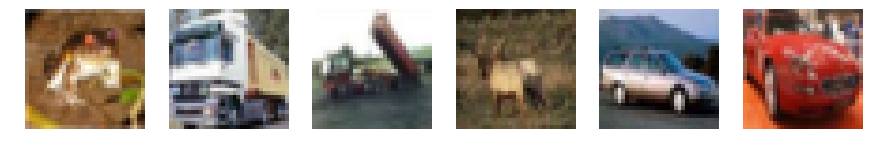

In [6]:
# Create sample images and show unaugmented
sample_images = x_train[:6]
sample_labels = y_train[:6]

fig, axes = plt.subplots(1, 6, squeeze=False, figsize=(15, 15))
for i in range(6):
  axes[0, i].axis('off')
  axes[0, i].imshow(sample_images[i])

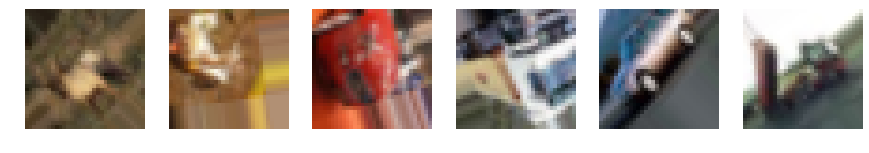

In [7]:
# Randomly shift, rotate, and flip images
srf_datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

for X_batch, y_batch in srf_datagen.flow(sample_images, 
                                         sample_labels, 
                                         batch_size=6):
  fig, axes = plt.subplots(1, 6, squeeze=False, figsize=(15, 15))
  for i in range(6):
    axes[0, i].axis('off')
    axes[0, i].imshow(X_batch[i])
  break

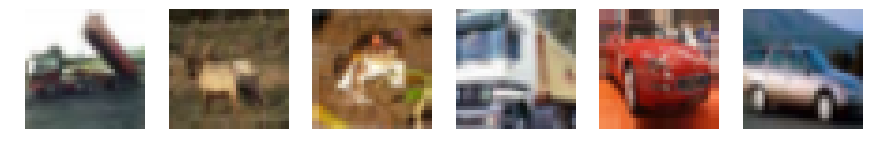

In [8]:
# Zoom in/out and shear images
zoom_datagen = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    shear_range=0.45)

for X_batch, y_batch in zoom_datagen.flow(sample_images, 
                                          sample_labels, 
                                          batch_size=6):
  fig, axes = plt.subplots(1, 6, squeeze=False, figsize=(15, 15))
  for i in range(6):
    axes[0, i].axis('off')
    axes[0, i].imshow(X_batch[i])
  break

In [0]:
# Define model architecture
feature_layers = [
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES),
    Activation('softmax')
]

In [0]:
# Build and compile model
model = Sequential(feature_layers + classification_layers)

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
# Use image augmentation for training
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

model.fit_generator(datagen.flow(x_train, y_train, 
                        batch_size=BATCH_SIZE),
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
391/391 [==============================] - 32s 81ms/step - loss: 2.0179 - acc: 0.2553 - val_loss: 1.7542 - val_acc: 0.3802
Epoch 2/10
107/391 [=======>......................] - ETA: 20s - loss: 1.8067 - acc: 0.3388

391/391 [==============================] - 30s 77ms/step - loss: 1.7573 - acc: 0.3570 - val_loss: 1.5893 - val_acc: 0.4375
Epoch 3/10
391/391 [==============================] - 29s 75ms/step - loss: 1.6455 - acc: 0.4009 - val_loss: 1.5526 - val_acc: 0.4395
Epoch 4/10
110/391 [=======>......................] - ETA: 19s - loss: 1.5910 - acc: 0.4240

391/391 [==============================] - 29s 75ms/step - loss: 1.5679 - acc: 0.4308 - val_loss: 1.4535 - val_acc: 0.4766
Epoch 5/10
391/391 [==============================] - 29s 74ms/step - loss: 1.5094 - acc: 0.4518 - val_loss: 1.3485 - val_acc: 0.5145
Epoch 6/10
 99/391 [======>.......................] - ETA: 19s - loss: 1.4743 - acc: 0.4655

391/391 [==============================] - 28s 71ms/step - loss: 1.4181 - acc: 0.4909 - val_loss: 1.3693 - val_acc: 0.5090
Epoch 8/10
391/391 [==============================] - 29s 74ms/step - loss: 1.3850 - acc: 0.5007 - val_loss: 1.2256 - val_acc: 0.5651
Epoch 9/10
 88/391 [=====>........................] - ETA: 20s - loss: 1.3597 - acc: 0.5127

391/391 [==============================] - 29s 74ms/step - loss: 1.3519 - acc: 0.5143 - val_loss: 1.1770 - val_acc: 0.5796
Epoch 10/10
391/391 [==============================] - 29s 74ms/step - loss: 1.3253 - acc: 0.5242 - val_loss: 1.2133 - val_acc: 0.5727


In [12]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 162us/step
Test loss: 1.2132898536682128
Test accuracy: 0.5727


In [0]:
# Freeze feature layers and recompile
for l in feature_layers:
    l.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [14]:
# Retrain model without image augmentation
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
50000/50000 [==============================] - 6s 116us/step - loss: 1.1905 - acc: 0.5766
Epoch 2/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.1706 - acc: 0.5845
Epoch 3/10
50000/50000 [==============================] - 6s 112us/step - loss: 1.1549 - acc: 0.5887
Epoch 4/10
50000/50000 [==============================] - 6s 114us/step - loss: 1.1362 - acc: 0.5977
Epoch 5/10
 2048/50000 [>.............................] - ETA: 5s - loss: 1.1208 - acc: 0.6089

50000/50000 [==============================] - 6s 113us/step - loss: 1.1255 - acc: 0.6022
Epoch 6/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.1170 - acc: 0.6038
Epoch 7/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.1025 - acc: 0.6107
Epoch 8/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.0978 - acc: 0.6124
Epoch 9/10
 6528/50000 [==>...........................] - ETA: 4s - loss: 1.0786 - acc: 0.6169

50000/50000 [==============================] - 6s 112us/step - loss: 1.0824 - acc: 0.6168
Epoch 10/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.0736 - acc: 0.6214


In [15]:
# Score final model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 164us/step
Test loss: 1.0199754482269288
Test accuracy: 0.6379
